In [9]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

In [10]:
# 1

x = np.array([2,3])
x_H = np.append(x, 1)

x_H_scaled = x_H * 2
print("x_H: ", x_H)
print("x_H_scaled: ", x_H_scaled)

def convertToCartesianCoord(homogenous_coord, dim=2):
    return homogenous_coord[:dim] / homogenous_coord[dim] # divide by scale

print()
print("x_H converted back: ", convertToCartesianCoord(x_H))
print("x_H_scaled converted back: ", convertToCartesianCoord(x_H_scaled))
cartesian_is_equal = (convertToCartesianCoord(x_H) == convertToCartesianCoord(x_H_scaled))
print("Is equal: ", cartesian_is_equal)

x_H:  [2 3 1]
x_H_scaled:  [4 6 2]

x_H converted back:  [2. 3.]
x_H_scaled converted back:  [2. 3.]
Is equal:  [ True  True]


In [11]:
# 2

y = np.array([4,5,6])
y_homogeneous = np.append(y, 1)

y_H = y_homogeneous * 2

print("Original y: ", y)
print("y_homogeneous: ", y_homogeneous)
print("y_H scaled by factor 2: ", y_H)

print("y_H scaled back to cartesian: ", convertToCartesianCoord(y_H, 3))
print("Matches with original y: ", convertToCartesianCoord(y_H, 3) == y)


Original y:  [4 5 6]
y_homogeneous:  [4 5 6 1]
y_H scaled by factor 2:  [ 8 10 12  2]
y_H scaled back to cartesian:  [4. 5. 6.]
Matches with original y:  [ True  True  True]


In [12]:
# 3

p = np.array([1,2])
p_H = np.append(p, 1)

scale_factor = 3
scaling_matrix = np.array([
    [scale_factor, 0, 0],
    [0, scale_factor, 0],
    [0, 0, 1]
])
scaled_p = scaling_matrix @ p_H
print("scaling matrix: \n", scaling_matrix)
print("scaled p_H: ", scaled_p)

theta = math.radians(45)
cos_theta = math.cos(theta)
sin_theta = math.sin(theta)
rotation_matrix = np.array([
    [cos_theta, -sin_theta, 0],
    [sin_theta, cos_theta, 0],
    [0, 0, 1]
])

rotated_scaled_p = rotation_matrix @ scaled_p
print("rotation matrix: \n", rotation_matrix)
print("rotated, scaled p_H, :", rotated_scaled_p)

translation_vector = [2,3]
translation_matrix = np.array([
    [1, 0, translation_vector[0]],
    [0, 1, translation_vector[1]],
    [0, 0, 1]
])

translated_rotated_scaled_p = translation_matrix @ rotated_scaled_p
print("translation matrix: \n", translation_matrix)
print("translated p, then rotated p, then scaled p: ", translated_rotated_scaled_p[:2])

combined_transformation_matrix = translation_matrix @ rotation_matrix @ scaling_matrix
print("combined transformation matrix: \n", combined_transformation_matrix)

transformed_p = combined_transformation_matrix @ p_H
print("transformation matrix applied to p: ", transformed_p[:2])

print("As you can see, applying scaling, rotating, and translating matrix to p individually yields the same results as combining all the transformation matrix and then applying it to p")



scaling matrix: 
 [[3 0 0]
 [0 3 0]
 [0 0 1]]
scaled p_H:  [3 6 1]
rotation matrix: 
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
rotated, scaled p_H, : [-2.12132034  6.36396103  1.        ]
translation matrix: 
 [[1 0 2]
 [0 1 3]
 [0 0 1]]
translated p, then rotated p, then scaled p:  [-0.12132034  9.36396103]
combined transformation matrix: 
 [[ 2.12132034 -2.12132034  2.        ]
 [ 2.12132034  2.12132034  3.        ]
 [ 0.          0.          1.        ]]
transformation matrix applied to p:  [-0.12132034  9.36396103]
As you can see, applying scaling, rotating, and translating matrix to p individually yields the same results as combining all the transformation matrix and then applying it to p


In [19]:
# 4

q = np.array([3, 4])
q_H = np.append(q, 1)

translation_vector = np.array([5, 5])
inverse_translation_matrix = np.array([
    [1, 0, -translation_vector[0]],
    [0, 1, -translation_vector[1]],
    [0, 0, 1]
])

theta = math.radians(30)
cos_theta = math.cos(theta)
sin_theta = math.sin(theta)
inverse_rotation_matrix = np.array([
    [cos_theta, sin_theta, 0],
    [-sin_theta, cos_theta, 0],
    [0, 0, 1]
])

scale_factor = 2
inverse_scale_matrix = np.array([
    [1/scale_factor, 0, 0],
    [0, 1/scale_factor, 0],
    [0, 0, 1]
])

inverse_combined_matrix = inverse_scale_matrix @ inverse_rotation_matrix @ inverse_translation_matrix

q_original = inverse_combined_matrix @ q_H

print("Original coordinate: ", q_original[:2])


Original coordinate:  [-1.1160254  0.0669873]


In [14]:
# 5

r = np.array([3, 3, 3])
r_H = np.append(r, 1)

# p^B = M_{B <- A} P^A
# M_{B <- A} = R^T T(-t)
translation_vector_A_to_B = [2-1, 2-1, 2-1]
A_to_B_translation_matrix = np.array([
    [1, 0, 0, -translation_vector_A_to_B[0]],
    [0, 1, 0, -translation_vector_A_to_B[1]],
    [0, 0, 1, -translation_vector_A_to_B[2]],
    [0, 0, 0, 1]
])

r_in_B = A_to_B_translation_matrix @ r_H

# R = I + sin(theta)K + (1 - cos(theta))K^2
rotation_axis_vector = [0, 0, 1] # rotated around z axis
K = np.array([
    [0, -rotation_axis_vector[2], rotation_axis_vector[1]],
    [rotation_axis_vector[2], 0, -rotation_axis_vector[0]],
    [-rotation_axis_vector[1], rotation_axis_vector[0], 0]
])
identity_matrix = np.eye(3)
theta = math.radians(90)
R = identity_matrix + math.sin(theta) * K + (1 - math.cos(theta)) * (K @ K)

rotation_matrix_homogeneous = np.eye(4)
rotation_matrix_homogeneous[:3, :3] = R


r_final_in_B = rotation_matrix_homogeneous @ r_in_B
print("r coord in B system: ", r_final_in_B[:3])



r coord in B system:  [-2.  2.  2.]


In [22]:
# 6

P = np.array([1, 2, 5])
# intrinsic matrix K:

K = np.array([
    [1000, 0, 500],
    [0, 1000, 500],
    [0, 0, 1]
])


p_H = K @ P
p = p_H[:2]/P[2]

print("p in 2d: ", p)

# camera coord to 2d coord
# p^(i) = M_{i < c} p^(c)

print("The two 1000s in K stands for the focal length in pixels in x y direction, and the two 500s in K stands for the focal center of the image in x y coordinate. [0 0 1] is to ensure homogeneous coordinates.")

p in 2d:  [700. 900.]
The two 1000s in K stands for the focal length in pixels in x y direction, and the two 500s in K stands for the focal center of the image in x y coordinate. [0 0 1] is to ensure homogeneous coordinates.


In [16]:
# 7

K = np.array([[1200, 0, 640],
              [0, 1200, 360],
              [0, 0, 1]])

# E = [R | T] extrinsic camera param
R = np.eye(3)
t = np.array([0, 0, -10])
E = np.hstack((R, t.reshape(3, 1))) # [R | T]

x_H = np.array([2, 3, 4, 1])        # Homogeneous X coord

X_camera = E @ x_H
p_H = K @ X_camera

p_2d = p_H[:2] / p_H[2]

print("p in 2d: ", p_2d)


p in 2d:  [ 240. -240.]


[[ 1.29903811 -0.75       42.45190528]
 [ 0.75        1.29903811 76.47114317]]


Text(0.5, 1.0, 'Transformed Image')

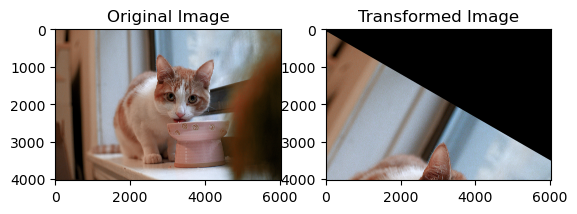

In [17]:
# 8

img = cv2.imread('isaac.jpg')

translation_vector = [50, 30]
translation_matrix = np.array([
    [1, 0, translation_vector[0]],
    [0, 1, translation_vector[1]],
    [0, 0, 1]
])

theta = math.radians(30)
sin_theta = math.sin(theta)
cos_theta = math.cos(theta)
rotation_matrix = np.array([
    [cos_theta, -sin_theta, 0],
    [sin_theta, cos_theta, 0],
    [0, 0, 1]
])

scaling_factor = 1.5 
scaling_matrix = np.array([
    [scaling_factor, 0, 0],
    [0, scaling_factor, 0],
    [0, 0, 1]
])

affine_transformation_matrix_H = scaling_matrix @ rotation_matrix @ translation_matrix

# print("affine_transformation_matrix_H: \n", affine_transformation_matrix_H)

affine_transformation_matrix = affine_transformation_matrix_H[:2][:]    # made it non homogeneous to fit cv2.warpAffine

print(affine_transformation_matrix)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

transformed_image = cv2.warpAffine(img, affine_transformation_matrix, (img.shape[1], img.shape[0]))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title("Transformed Image")

In [23]:
# 9

s = np.array([1, 1])
s_H = np.append(s, 1)

theta = math.radians(90)
sin_theta = math.sin(theta)
cos_theta = math.cos(theta)
rotation_matrix = np.array([
    [cos_theta, -sin_theta, 0],
    [sin_theta, cos_theta, 0],
    [0, 0, 1]
])

scale_factor = 2
scaling_matrix = np.array([
    [scale_factor, 0, 0],
    [0, scale_factor, 0],
    [0, 0, 1]
])

translation_vector = [-1, 1]
translation_matrix = np.array([
    [1, 0, translation_vector[0]],
    [0, 1, translation_vector[1]],
    [0, 0, 1]
])

s_normal_order_transformation = translation_matrix @ scaling_matrix @ rotation_matrix @ s_H

print("Normal order transformation: ", s_normal_order_transformation[:2])

s_reverse_order_transformation = rotation_matrix @ scaling_matrix @ translation_matrix @ s_H

print("Reverse order transformation: ", s_reverse_order_transformation[:2])

print("Different sequences of transformation results in different final positions of the point even if the individual operations stay the same.")

Normal order transformation:  [-3.  3.]
Reverse order transformation:  [-4.00000000e+00  2.22044605e-16]
Different sequences of transformation results in different final positions of the point even if the individual operations stay the same.
